In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image #this is python image library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


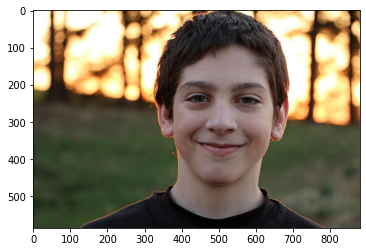

In [ ]:
testboi  = plt.imshow(mpimg.imread('/content/drive/My Drive/test.jpg'))

In [ ]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep
import glob
from PIL import Image 
import re

***FORMATTING THE JAFFE DATA SET SO THAT IT CAN BE ADDED TO THE REST OF MODEL LATER ON***

In [ ]:
#Trying on a single image

img = Image.open('/content/drive/My Drive/JaffeImagesOnly/MK.AN3.127.tiff') #open image
#going to resize the images to 48*48 so that when i flatten the array they still make sense (i.e. the images dont become all jumbled)
img_asarray = np.array(img) #turn into 2d numpy array

img_1d = img_asarray.flatten() #flatten into 1d array of pixels

In [ ]:
img_1d
#now i have an array of pixels. Need to remove commas and add emotion...

array([110, 110, 115, ..., 143, 140, 130], dtype=uint8)

In [ ]:
JAFFE_images = [] #creating empty list to append each image to
JAFFE_img_names = [] #creating empty list to append the name of each image to

for f in glob.iglob("/content/drive/My Drive/JaffeImagesOnly/*.tiff"): #iteratively going through each file in the dataset
    JAFFE_images.append([np.asarray(Image.open(f)).flatten(),]) #adding the image to the dataset once it is turned into a 2-D array and flattened to a 1D array

for f in glob.iglob("/content/drive/My Drive/JaffeImagesOnly/*.tiff"):
    m = re.search('(?<=Only/)\w+', f)
    JAFFE_img_names.append(m) #cant seem to find a way to only get the end of the file name...


print(JAFFE_images)  #this is a list of all images turned into 1D-arrays
print(JAFFE_img_names) # this is a list of all image titles in the same order as the images

[[array([ 68,  75,  70, ..., 108, 107, 100], dtype=uint8)], [array([101, 103, 101, ..., 125, 119, 143], dtype=uint8)], [array([176, 166, 186, ..., 208, 198, 201], dtype=uint8)], [array([174, 163, 164, ..., 197, 204, 209], dtype=uint8)], [array([105, 102, 108, ..., 119, 113, 119], dtype=uint8)], [array([113, 111, 108, ...,  66,  66,  68], dtype=uint8)], [array([110, 110, 115, ..., 143, 140, 130], dtype=uint8)], [array([117, 122, 117, ..., 142, 145, 159], dtype=uint8)], [array([ 30,  31,  34, ..., 134, 136, 130], dtype=uint8)], [array([116, 107, 109, ..., 128, 132, 133], dtype=uint8)], [array([ 98, 100, 113, ...,  94,  94,  92], dtype=uint8)], [array([110, 116, 113, ..., 103, 107, 102], dtype=uint8)], [array([116, 120, 122, ..., 112, 114, 117], dtype=uint8)], [array([119, 130, 130, ..., 114, 112, 112], dtype=uint8)], [array([116, 115, 117, ..., 117, 119, 126], dtype=uint8)], [array([160, 159, 158, ..., 125, 127, 124], dtype=uint8)], [array([163, 157, 157, ..., 153, 145, 153], dtype=uint8

In [ ]:
jaf_df = pd.DataFrame(JAFFE_images)
nam_df = pd.DataFrame(JAFFE_img_names)

JAFFE = pd.concat([jaf_df,nam_df],axis=1)

JAFFE.head(5)

,0,0
0,"[68, 75, 70, 68, 65, 70, 75, 98, 119, 118, 124...",/content/drive/My Drive/JaffeImagesOnly/MK.NE1...
1,"[101, 103, 101, 101, 121, 104, 105, 102, 108, ...",/content/drive/My Drive/JaffeImagesOnly/MK.SA1...
2,"[176, 166, 186, 182, 178, 172, 181, 177, 177, ...",/content/drive/My Drive/JaffeImagesOnly/YM.AN2...
3,"[174, 163, 164, 164, 167, 169, 169, 171, 175, ...",/content/drive/My Drive/JaffeImagesOnly/YM.AN3...
4,"[105, 102, 108, 118, 114, 117, 113, 122, 113, ...",/content/drive/My Drive/JaffeImagesOnly/KA.AN1...


In [ ]:
JAFFE.columns = ['Pixel values','ImageTitle']
JAFFE.head(5)

,Pixel values,ImageTitle
0,"[68, 75, 70, 68, 65, 70, 75, 98, 119, 118, 124...",/content/drive/My Drive/JaffeImagesOnly/MK.NE1...
1,"[101, 103, 101, 101, 121, 104, 105, 102, 108, ...",/content/drive/My Drive/JaffeImagesOnly/MK.SA1...
2,"[176, 166, 186, 182, 178, 172, 181, 177, 177, ...",/content/drive/My Drive/JaffeImagesOnly/YM.AN2...
3,"[174, 163, 164, 164, 167, 169, 169, 171, 175, ...",/content/drive/My Drive/JaffeImagesOnly/YM.AN3...
4,"[105, 102, 108, 118, 114, 117, 113, 122, 113, ...",/content/drive/My Drive/JaffeImagesOnly/KA.AN1...


In [ ]:
####TODO###
#Remove the commas from the arrays
#Remove the path name from the image titles and replace the full stops with dashes

In [ ]:
JAFFE_emotions = pd.read_csv('/content/drive/My Drive/JAFFE_Emotions.txt', sep=" ", header=None)

In [ ]:
JAFFE_emotions.head()

,0,1,2,3,4,5,6,7,8
0,#,HAP,SAD,SUR,ANG,DIS,FEA,PIC,Candidate
1,----------------------------------------------...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2.87,2.52,2.10,1.97,1.97,2.06,KM-NE1,NaN
3,2,2.87,2.42,1.58,1.84,1.77,1.77,KM-NE2,NaN
4,3,2.50,2.10,1.70,1.50,1.73,1.53,KM-NE3,NaN


In [ ]:
#making the first row of the dataframe the title of the columns
# these are the labels used later on in the other dataset labels = 
new_header = JAFFE_emotions.iloc[0] #grab the first row for the header
JAFFE_emotions = JAFFE_emotions[0:] #take the data less the header row
JAFFE_emotions.columns = new_header #set the header row as the df header

In [ ]:
JAFFE_emotions.rename(columns=JAFFE_emotions.iloc[0])

,#,HAP,SAD,SUR,ANG,DIS,FEA,PIC,Candidate
0,#,HAP,SAD,SUR,ANG,DIS,FEA,PIC,Candidate
1,----------------------------------------------...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2.87,2.52,2.10,1.97,1.97,2.06,KM-NE1,NaN
3,2,2.87,2.42,1.58,1.84,1.77,1.77,KM-NE2,NaN
4,3,2.50,2.10,1.70,1.50,1.73,1.53,KM-NE3,NaN
...,...,...,...,...,...,...,...,...,...
216,215,1.45,3.19,1.81,3.16,4.19,2.77,NA-DI2,NaN
217,216,1.43,2.87,1.77,4.33,3.87,2.10,NA-DI3,NaN
218,217,1.61,2.68,4.10,3.16,3.81,3.90,NA-FE1,NaN
219,218,1.68,3.10,3.74,3.19,3.58,3.87,NA-FE2,NaN


In [ ]:
#deleting the first two garbage rows
JAFFE_emotions = JAFFE_emotions.iloc[2:]
JAFFE_emotions.head(5)

,#,HAP,SAD,SUR,ANG,DIS,FEA,PIC,Candidate
2,1,2.87,2.52,2.10,1.97,1.97,2.06,KM-NE1,NaN
3,2,2.87,2.42,1.58,1.84,1.77,1.77,KM-NE2,NaN
4,3,2.50,2.10,1.70,1.50,1.73,1.53,KM-NE3,NaN
5,4,4.90,1.13,1.26,1.10,1.03,1.10,KM-HA1,NaN
6,5,4.87,1.20,1.43,1.03,1.07,1.07,KM-HA2,NaN


In [ ]:
#fixing column titles
JAFFE_emotions.columns = ['ID','Happy', 'Sad','Surprise','Angry','Disgust','Fear','ImageID','garbage']

In [ ]:
#getting rid of 'garbage column'
JAFFE_emotion = JAFFE_emotions.drop(['garbage','ID'],axis=1)
JAFFE_emotion.head(5)

,Happy,Sad,Surprise,Angry,Disgust,Fear,ImageID
2,2.87,2.52,2.10,1.97,1.97,2.06,KM-NE1
3,2.87,2.42,1.58,1.84,1.77,1.77,KM-NE2
4,2.50,2.10,1.70,1.50,1.73,1.53,KM-NE3
5,4.90,1.13,1.26,1.10,1.03,1.10,KM-HA1
6,4.87,1.20,1.43,1.03,1.07,1.07,KM-HA2


In [ ]:
#index is fucked I will reset it
JAFFE_emotion = JAFFE_emotion.reset_index(drop=True) 
JAFFE_emotion.head(100)

,Happy,Sad,Surprise,Angry,Disgust,Fear,ImageID
0,2.87,2.52,2.10,1.97,1.97,2.06,KM-NE1
1,2.87,2.42,1.58,1.84,1.77,1.77,KM-NE2
2,2.50,2.10,1.70,1.50,1.73,1.53,KM-NE3
3,4.90,1.13,1.26,1.10,1.03,1.10,KM-HA1
4,4.87,1.20,1.43,1.03,1.07,1.07,KM-HA2
...,...,...,...,...,...,...,...
95,4.39,1.42,2.10,1.32,1.26,1.23,NM-HA2
96,4.19,1.45,1.84,1.42,1.35,1.39,NM-HA3
97,2.00,3.77,1.67,1.77,1.77,2.29,NM-SA1
98,2.48,2.68,1.81,1.97,1.90,1.84,NM-SA2


# Three Options here : 

**1)** Either I take the highest value and assign that emotion to each image. 

**2)** Alernatively I run a completely new model with all the values for each image (although we have less data here I feel like it will give a more nuanced picture and not mislabel as often ?) - equally though we have so few images that it might just give no certitude for anything.

- Main problem is that these are all japanese women so it wont work well on anyone else. 

**3)** Ideally I would like to merge these with the other data and weight them more heavily as they are more nuanced - and so more valuable in my opinion. If they are not weighted they will have very little impact as they represent 0.5% of the total dataset

In [ ]:
#First going to assign each set of emotions with its respective image

In [ ]:
 ### START OF THE WORKING MODEL###

**### START OF THE WORKING MODEL###**


In [ ]:
data = pd.read_csv('/content/drive/My Drive/fer2013/fer2013.zip')

In [ ]:
### TODO ###

#- Add more data sets (JAFFE)
#   -Download the data and make it in the same format as the FER2013 data
#   - Append to the FER2013 dataset and re run the model  

#- Add features and feed those into the model as well (like face markers using dlib)
#   -Apply the dlib markers to the dataset
#   -Convert all the data into a 'readable' format for the model
#   -re run the model

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [ ]:
#Append the JAFFE data to the 'data' dataframe here

In [ ]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
print(len(data.iloc[8,1]))
print(len(data.iloc[4,1]))
print(len(data.iloc[3,1]))
#the number of pixels is not the same in all pictures
#I was going to resize the JAFFE dataset to have a certain number of pixels in an array 
#but this doesnt seem to matter as they get re-sized later on anyways

8793
7721
8555


In [ ]:
#setting height and width of images
width = 48
height = 48


In [ ]:
# this selects all the pixels in the first row
#i.e. this is one image
data.iloc[0,1]

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [ ]:
datapoints = data['pixels'].tolist()
#I want to try and not use a list
#they are less memory efficient 
#not sure why the values have been put into a list ?

In [ ]:
#getting features for training
X = []
for xseq in datapoints:
    xx = [int(xp) for xp in xseq.split(' ')] #Dont understand this line 
    xx = np.asarray(xx).reshape(width, height)
    X.append(xx.astype('float32'))
#Getting training features (x -pixels) and labels(y-emotions) and converting into numpy arrays
X = np.asarray(X)
X = np.expand_dims(X, -1) #adding another dimsnsion to the feature vector to make the input suitable for the CNN

In [ ]:
print(X.shape)

(35887, 48, 48, 1)


In [ ]:
#getting labels for training

pd.get_dummies(data['emotion'])
#.get_dummies returns a 1 for each instance of an emotion in any given column

,0,1,2,3,4,5,6
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
35882,0,0,0,0,0,0,1
35883,0,0,0,1,0,0,0
35884,1,0,0,0,0,0,0
35885,0,0,0,1,0,0,0


In [ ]:
y_1 = pd.get_dummies(data['emotion'])
#assigning the 'one hot encoded' dataframe to a variable 
# print (y_1)

In [ ]:
y = y_1.values
#turning the data frame into a numpy matrix
#so that it can be processed easier

In [ ]:
#saving X and y values with new labels using numpy
np.save('fdataX', X) #X is each image (i.e. the pixel values for each image)
np.save('flabels', y) #y is the emotion associated with that combination of pixels

In [ ]:
print("Number of Features: ",str(len(X[0])))
print("Number of Labels: ",str(len(y[0])))
print("Number of examples in dataset:",str(len(X)))
#X,y stored in fdataX.npy and flabels.npy respectively

Number of Features:  48
Number of Labels:  7
Number of examples in dataset: 35887


In [ ]:
###Starting to make the model###

import sys, os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2

In [ ]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 50
width, height = 48, 48
#will have to find some precedence in the litterature for these values

In [ ]:
#loading in our data and labels that we saved earlier on
x = np.load('./fdataX.npy')
y = np.load('./flabels.npy')

In [ ]:
# print (x)
# unhash to view normal pixel values (0-255)

In [ ]:
x -= np.mean(x, axis=0)
x /= np.std(x, axis=0)
#standardising x by subtracting the mean and dividing by the standard deviation

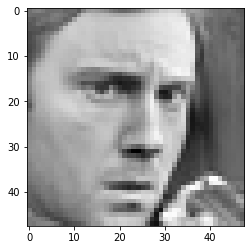

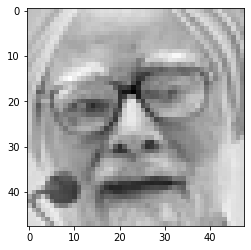

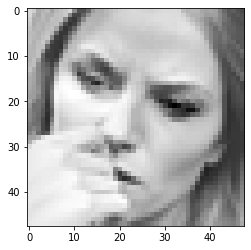

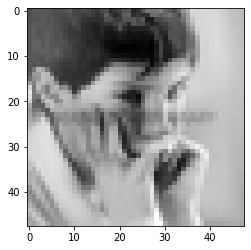

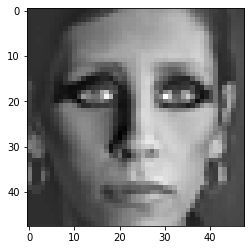

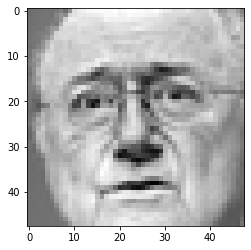

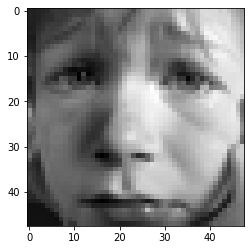

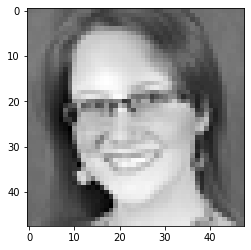

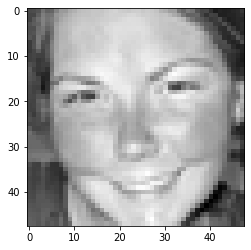

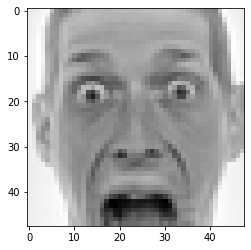

In [ ]:
for X in range(10):
   plt.figure(X)
   plt.imshow(x[X].reshape((48, 48)), interpolation='none', cmap='gray') 
plt.show()
#must be 48*48 because there are 2304 pixels and sqrt(2304) = 48
#use interpolation = 'hermite' for clearer images

In [ ]:
#splitting into training, validation and testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=41)
#I want to try and use test_size = 0.2

In [ ]:
#saving the test samples to be used later
np.save('modXtest', X_test)
np.save('modytest', y_test)

In [ ]:
#desinging the CNN
model = Sequential()

model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(2*2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*num_features, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels, activation='softmax'))

model.summary()

#definitely need to play around with all the variables in here 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 128)       5

In [ ]:
#Compliling the model with adam optimixer and categorical crossentropy loss
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

#training the model
model.fit(np.array(X_train), np.array(y_train),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(np.array(X_valid), np.array(y_valid)),
          shuffle=True)

#saving the  model to be used later
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")
print("Saved model to disk")

Epoch 1/50
455/455 [==============================] - 20s 44ms/step - loss: 1.9806 - accuracy: 0.2198 - val_loss: 1.8048 - val_accuracy: 0.2613
Epoch 2/50
455/455 [==============================] - 20s 44ms/step - loss: 1.8345 - accuracy: 0.2480 - val_loss: 1.7451 - val_accuracy: 0.2920
Epoch 3/50
455/455 [==============================] - 20s 44ms/step - loss: 1.7378 - accuracy: 0.2970 - val_loss: 1.5858 - val_accuracy: 0.3517
Epoch 4/50
455/455 [==============================] - 20s 43ms/step - loss: 1.6213 - accuracy: 0.3540 - val_loss: 1.4357 - val_accuracy: 0.4294
Epoch 5/50
455/455 [==============================] - 19s 43ms/step - loss: 1.5156 - accuracy: 0.4086 - val_loss: 1.4034 - val_accuracy: 0.4440
Epoch 6/50
455/455 [==============================] - 20s 43ms/step - loss: 1.4564 - accuracy: 0.4300 - val_loss: 1.3535 - val_accuracy: 0.4771
Epoch 7/50
455/455 [==============================] - 20s 43ms/step - loss: 1.4098 - accuracy: 0.4570 - val_loss: 1.2797 - val_accuracy:

In [ ]:
###Applying model to images###

In [ ]:
import cv2

In [ ]:
# load json and create model
from __future__ import division
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os
import numpy as np

json_file = open('fer.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("fer.h5")
print("Loaded model from disk")

truey=[]
predy=[]
x = np.load('./modXtest.npy')
y = np.load('./modytest.npy')

yhat= loaded_model.predict(x)
yh = yhat.tolist()
yt = y.tolist()
count = 0

for i in range(len(y)):
    yy = max(yh[i])
    yyt = max(yt[i])
    predy.append(yh[i].index(yy))
    truey.append(yt[i].index(yyt))
    if(yh[i].index(yy)== yt[i].index(yyt)):
        count+=1

acc = (count/len(y))*100

#saving values for confusion matrix and analysis
np.save('truey', truey)
np.save('predy', predy)
print("Predicted and true label values saved")
print("Accuracy on test set :"+str(acc)+"%")

Loaded model from disk
Predicted and true label values saved
Accuracy on test set :64.66982446363889%


In [ ]:
from google.colab import files
file=files.upload()

Saving mariamtest4.jpeg to mariamtest4.jpeg


Loaded model from disk
Emotion: Fear
['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
[[5.5903418e-04 6.0566945e-06 9.8801863e-01 6.9080663e-05 1.4521761e-03
  9.8844450e-03 1.0486869e-05]]


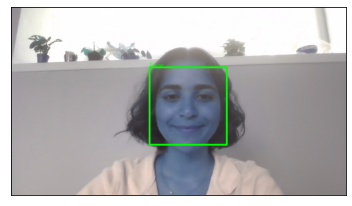

In [ ]:
# load json and create model
from __future__ import division
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt


#loading the model
json_file = open('fer.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("fer.h5")
print("Loaded model from disk")

#setting image resizing parameters
WIDTH = 48
HEIGHT = 48
x=None
y=None
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']


#loading image
img = cv2.imread('mariamtest4.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
#print(faces)
#print(gray)

#detecting faces
for (x,y,w,h) in faces:
    roi_gray = gray[y:y + h, x:x + w]
    cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),5)
    cv2.normalize(cropped_img, cropped_img, alpha=0, beta=1, norm_type=cv2.NORM_L2, dtype=cv2.CV_32F)
    
  
    #predicting the emotion
    yhat= loaded_model.predict(cropped_img)
    cv2.putText(img, labels[int(np.argmax(yhat))], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 1, cv2.LINE_AA)
    print("Emotion: "+labels[int(np.argmax(yhat))])

plt.grid(None)   
plt.xticks([])
plt.yticks([])
plt.imshow(img)
#when not in colabs use:
#cv2.imshow(img)
# plt.imshow(cropped_img)

print (labels)
print (yhat)
 #this returns the probability of each emotion
